In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('coffee-walmart-stores.csv')
df.head()

,title,coffee_type,rating,reviews,seller_name,thumbnail,price,weight,weight_formatted_to_gramms
0,"folgers classic roast ground coffee, 40.3-ounce",classic roast,3.8,93,walmart.com,https://i5.walmartimages.com/asr/1fbbd523-8554...,13.92,40.3-ounce,1142.5
1,"café bustelo, espresso style dark roast ground...","espresso,dark roast",4.7,914,walmart.com,https://i5.walmartimages.com/asr/99a53df0-0471...,3.76,10 oz,283.5
2,"folgers classic roast ground coffee, medium ro...","medium roast,classic roast",4.4,740,walmart.com,https://i5.walmartimages.com/asr/e6aba325-608e...,9.97,25.9 ounce,734.3
3,"maxwell house original roast ground coffee, 42...",NaN,4.8,1321,walmart.com,https://i5.walmartimages.com/asr/a5be9586-b75d...,9.92,42.5 oz,1204.9
4,great value classic roast medium ground coffee...,classic roast,4.7,1598,walmart.com,https://i5.walmartimages.com/asr/de42310c-4cd6...,9.98,48 oz,1360.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       1400 non-null   object 
 1   coffee_type                 1121 non-null   object 
 2   rating                      1400 non-null   float64
 3   reviews                     1400 non-null   int64  
 4   seller_name                 1400 non-null   object 
 5   thumbnail                   1400 non-null   object 
 6   price                       1400 non-null   float64
 7   weight                      1400 non-null   object 
 8   weight_formatted_to_gramms  1400 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 98.6+ KB


In [4]:
df.isnull().sum()

title                           0
coffee_type                   279
rating                          0
reviews                         0
seller_name                     0
thumbnail                       0
price                           0
weight                          0
weight_formatted_to_gramms      0
dtype: int64

In [5]:
df = df.fillna(0)

In [6]:
df.isnull().sum()

title                         0
coffee_type                   0
rating                        0
reviews                       0
seller_name                   0
thumbnail                     0
price                         0
weight                        0
weight_formatted_to_gramms    0
dtype: int64

In [13]:
top_6_preco = (
    df.groupby('coffee_type')['price']
    .median()
    .sort_values(ascending=False)
    .head(6)
    .index
)

In [14]:
df_top_6_preco = df[df['coffee_type'].isin(top_6_preco)]

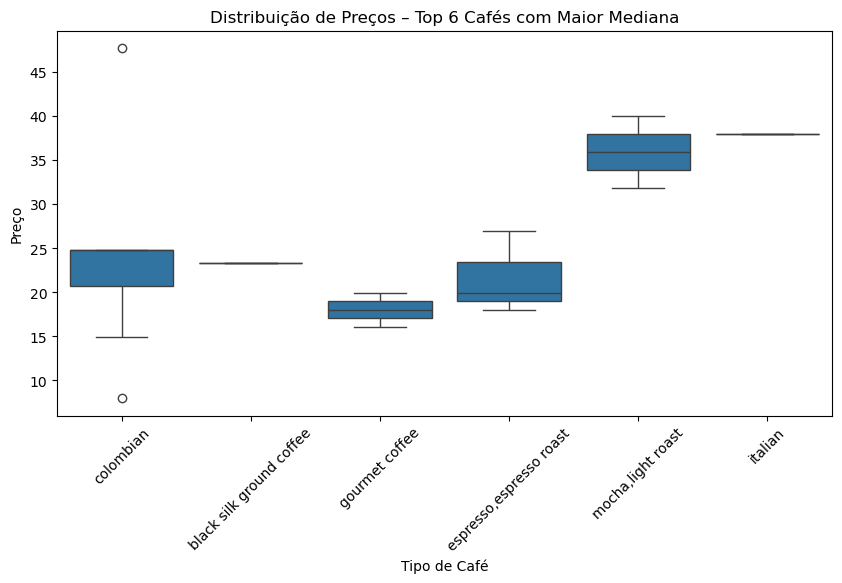

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x='coffee_type', y='price', data=df_top_6_preco)
plt.title('Distribuição de Preços – Top 6 Cafés com Maior Mediana')
plt.xlabel('Tipo de Café')
plt.ylabel('Preço')
plt.xticks(rotation=45)
plt.show()

In [16]:
top_6_rating = (
    df.groupby('coffee_type')['rating']
    .mean()
    .sort_values(ascending=False)
    .head(6)
    .index
)

In [17]:
df_top_6_rating = df[df['coffee_type'].isin(top_6_rating)]

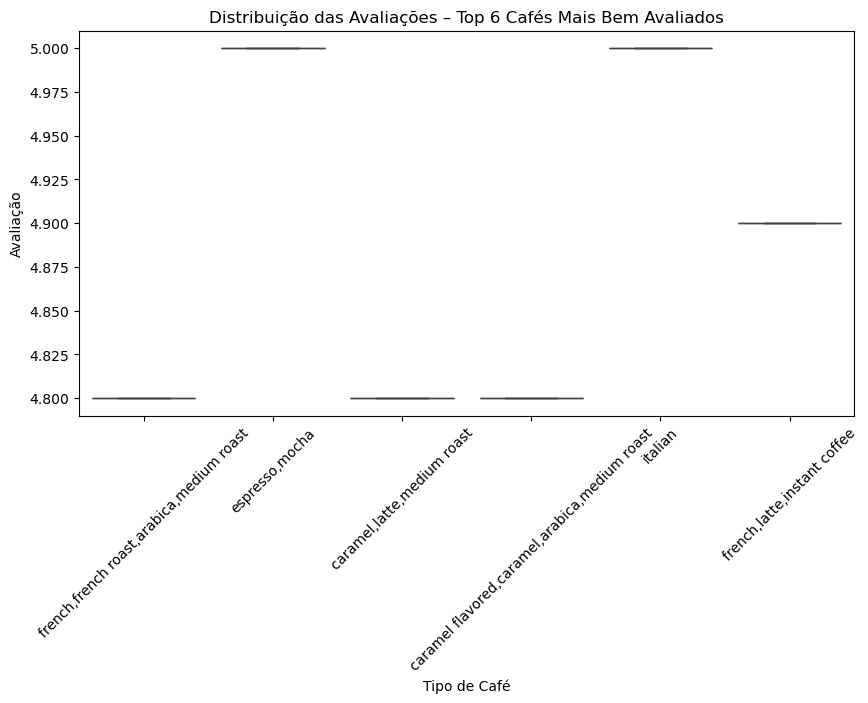

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x='coffee_type', y='rating', data=df_top_6_rating)
plt.title('Distribuição das Avaliações – Top 6 Cafés Mais Bem Avaliados')
plt.xlabel('Tipo de Café')
plt.ylabel('Avaliação')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Para melhorar a clareza da visualização, foram selecionados apenas os seis tipos de café com maior mediana de preço e os seis com maior média de avaliação. 
#Essa abordagem permite uma comparação mais objetiva, reduzindo ruídos visuais e destacando padrões relevantes.